## Overview exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.
For each of the following questions, formulate a null and alternative hypothesis 
(be as specific as you can be), then give an example of what a true positive, true 
negative, type I and type II errors would look like. Note that some of the questions
are intentionally phrased in a vague way. It is your job to reword these as more precise
questions that could be tested.


In [ ]:
#Has the network latency gone up since we switched internet service providers?
Ho: network latency has stayed the same or been worse
Hα: newtork latency has gone up
True Positive: network latecy has gone up and we reject Ho
True Negative: network latecy stayed same and we accept Ho
False Positive: network latency stayed same but we failed to accept Ho
False negative: network latecy gone but we accepted Ho  

In [ ]:
#Is the website redesign any good?
Ho:people spend same amount of time in the website
Hα: people have been spending more time in the website
True postive: we rejected Ho. people spent more time in the website
True negative: we failed to reject Ho. people did not spend more time in the website
False positive: rejected Ho. we thought people spent more time but we were worng
False negative: failed to reject Ho. people spent more time in the website but we thought otherwise

In [ ]:
#Is our television ad driving more sales?
Ho: tv revenue has stayed the same
Hα: tv revenue has increased
True positive: we rejected Ho. tv revenue has gone up as expected such
True negative: we failed to reject Ho. tv revenue stayed the same as expected such
False postive: we rejected Ho. tv revenuse increased but we failed to show that
False negative: we failed to reject Ho. tv revenue stayed the same but we showed it did

## T test exercises

Ace Realty wants to determine whether the average time it takesto sell homes is different for its two offices. A  sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.


In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data


In [2]:
# formulate hypotheses

# H0: mean sales time for Office 1 = mean sales time for Office 2. 
# H1: mean sales time for Office 1 != mean sales time for Office 2

In [8]:
#tailness: we are comparing inequality, equal to or not equal to so it it two tailed 
#it is 2 sample test as they are two differrent offices

#my data
#office1
μ1 = 90
σ1= 15
n1 = 40

#office2
μ2 = 100
σ2 = 20
n2 = 50

In [8]:
# my assumptions
#are they normal distribution:yes(we are gonna say so)
#are variance different:yes
#are they independent data: yes


In [39]:
alpha = 0.05

In [10]:
t, p = stats.ttest_ind_from_stats(μ1,σ1,n1, μ2,σ2,n2, equal_var= False)

In [11]:
t, p

(-2.7091418459143854, 0.00811206270346016)

In [12]:
if p < alpha:
    print("we reject null hypothesis")
else:
    print("we fail to reject null hypothesis")

we reject null hypothesis


In [10]:
#this can be solved using rvs also
office1 = stats.norm(μ1, σ1).rvs(n1)
office2 = stats.norm(μ2, σ2).rvs(n2)

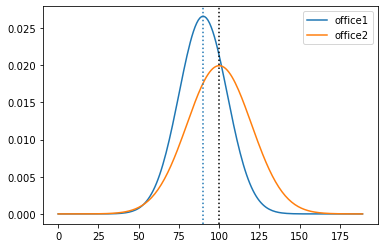

In [24]:
#lets see the graph
x = np.arange(190)
y1= stats.norm(μ1, σ1).pdf(x)
y2=stats.norm(μ2, σ2).pdf(x)
plt.plot(x,y1,label='office1')
plt.plot(x,y2,label='office2')
plt.axvline(90,ls = ":")
plt.axvline(100,ls = ":",color= 'black')
plt.legend()
plt.show()

In [ ]:
#the verticle lines at mean show the mean are spread out well enough

Load the mpg dataset and use it to answer the following questions:

In [26]:
mpg = data('mpg')


1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [28]:
mpg["average_mpg"] = stats.hmean(mpg[["cty","hwy"]],axis = 1)
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766


In [29]:
avg_mpg_2008 = mpg[mpg.year == 2008].average_mpg
avg_mpg_2008.head(1)

3    24.313725
Name: average_mpg, dtype: float64

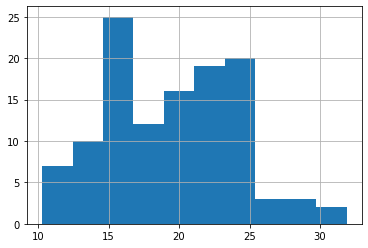

In [35]:
avg_mpg_2008.hist()
plt.show()

In [ ]:
#normal looking graph

In [33]:
avg_mpg_1999 = mpg[mpg.year == 1999].average_mpg
avg_mpg_1999.head(1)

1    22.212766
Name: average_mpg, dtype: float64

<AxesSubplot:>

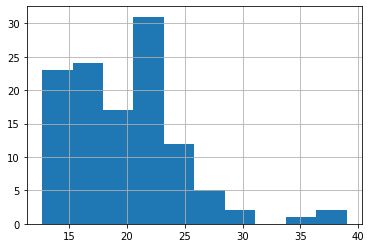

In [34]:
avg_mpg_1999.hist()

In [ ]:
#normal looking graph

In [36]:
#variance test: are they equal
#Ho:variances are equal
#H1:variances are not equal

tstat,p_levene = stats.levene(avg_mpg_2008, avg_mpg_1999)

In [37]:
tstat, p_levene

(0.031071867429515194, 0.8602339200830025)

In [43]:
alpha = 0.05
if p_levene < alpha:
    print ("reject null hypothesis, meaning variance is not equal")
else:
    print("fail to reject null hypothesis, meaning variance is equal")

fail to reject null hypothesis, meaning variance is equal


In [24]:
#Ho: avg_mpg_2008 == avg_mpg_1999
#H1: avg_mpg_1999 != avg_mpg_1999

#distro is normal, CLT
#variance is same
#independent sample


In [25]:
#find t and p value
t,p = stats.ttest_ind(avg_mpg_2008, avg_mpg_1999, equal_var = True)
t,p

(-0.3011962975077886, 0.7635345888327115)

In [26]:
if p < alpha:
    print("reject null hypothesis")
else:
    print("cannot reject null hypothesis")

cannot reject null hypothesis


2. Are compact cars more fuel-efficient than the average car?


In [28]:
#first find average mpg of all car
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [29]:
average_all_car = mpg.average_mpg.mean()
average_all_car

19.585525317633177

In [30]:
compact_mpg = mpg[mpg['class'] == 'compact'].average_mpg
compact_mpg.head()

1    22.212766
2    24.360000
3    24.313725
4    24.705882
5    19.809524
Name: average_mpg, dtype: float64

In [31]:
#variance test

In [32]:
#Ho: mpg of compact car =< mpg of all car
#H1: mpg of compact car > mpg of all car

In [43]:
#t test
t,p = stats.ttest_1samp(compact_mpg,average_all_car )
t,p/2

(7.512360093161354, 7.808833174403864e-10)

In [56]:
if (t > 0) and (p/2 < alpha):
    print("reject null hypothesis and say that compact cars are more fuel efficient than average cars")
else:
    print("cannot reject null hypothesis say that compact cars are not more fuel efficient than average cars")

reject null hypothesis and say that compact cars are more fuel efficient than average cars


3.  Do manual cars get better gas mileage than automatic cars?
mpg.head(1)

In [46]:
auto_mpg = mpg[mpg.trans.str.contains("auto")].average_mpg
auto_mpg.head(1)

1    22.212766
Name: average_mpg, dtype: float64

<AxesSubplot:>

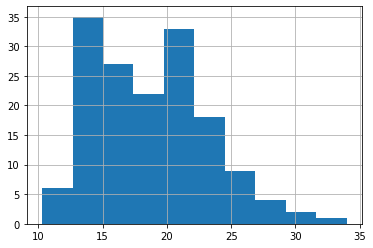

In [47]:
auto_mpg.hist()

In [ ]:
#looks like a normal distribution

In [49]:
manual_mpg = mpg[mpg.trans.str.contains("manual")].average_mpg
manual_mpg.head(1)

2    24.36
Name: average_mpg, dtype: float64

<AxesSubplot:>

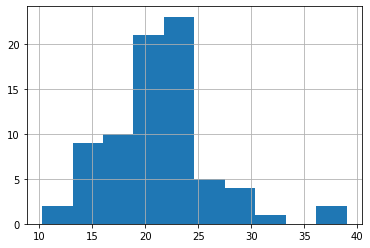

In [50]:
manual_mpg.hist()

In [ ]:
#looks like a normal distribution graph

In [38]:
#variance test
#Ho: variances are same
#H1: variances are different
stat,p_levene = stats.levene(manual_mpg,auto_mpg)
p_levene

0.9062462281015493

In [39]:
# varience is same as pval is greater than alpha

In [52]:
#set up
#Ho: manual_mpg =< auto_mpg
#H1:manual_mpg > auto_mpg
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var = True)
t,p/2

(4.652577547151351, 2.7552323050220026e-06)

In [54]:
# it is one tailed test
if (t>0) and (p/2 < alpha):
    print("reject null hypothesis and say that is manual cars have better fuel efficiency than automatic")
else:
    print("cannot reject null hypothesis and say that is manaul cars do not have better fuel efficiency than automatic")

reject null hypothesis and say that is manual cars have better fuel efficiency than automatic


##  Correlation:
1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

Does tenure correlate with monthly charges?

In [2]:
df = pd.read_csv('telco_churn.csv')
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
#can change all coloums to lowercase 
#df.columns=df.colums.str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


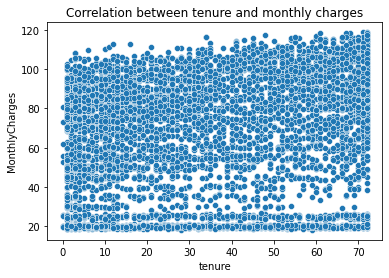

In [62]:
#plot our variablbes
sns.scatterplot(data=df, x = "tenure", y = "MonthlyCharges")
plt.title("Correlation between tenure and monthly charges")
plt.show()

In [11]:
#our assumptions:
#Ho: there is no correlation between tenure and monthly charges
#Ha:there is a correlation betweeen tenure and manthly charges
#calculate r and p
r,p = stats.pearsonr(df.tenure,df.MonthlyCharges)
print('r=', r)
print('p=', p)

r= 0.24789985628615002
p= 4.0940449915016345e-99


In [15]:
if p<alpha:
    print('we reject null hypothese and say there is a linear correlation')
else:
    print("we fail to reject null hypothesis and say there is no linear correction")
    

we reject null hypothese and say there is a linear correlation


Does tenure correlate with total charges?

In [57]:
#totalcharge column is an object and needs clean up
# do some data cleaning for TotalCharges column

df.TotalCharges = pd.to_numeric(df.TotalCharges,errors = 'coerce')
df = df.replace(np.nan, 0)
df.head()
#another way
#df.totalcharges.str.replace(" ","0"): replace empty with zero
#or filter out do greater than zero
#or df[df.totalcharges != 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


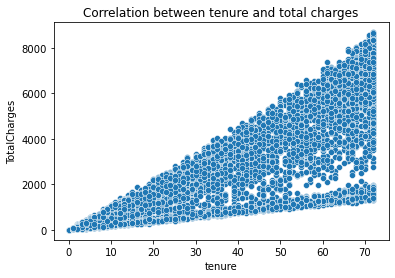

In [61]:
#scatter plot
sns.scatterplot(data= df, x = df.tenure, y= df.TotalCharges)
plt.title("Correlation between tenure and total charges")
plt.show()

In [55]:
#our assumptions
#Ho: there is no linear coorelation between tenure and total charge
#Ha: there is a linear correlation between tenure and total charge
r,p = stats.pearsonr(df.tenure,df.TotalCharges)
r,p

(0.8261783979502421, 0.0)

In [59]:
if p<alpha:
    print("we reject null hypothesis and say there is a linear correlation between tenure and total charge")
else:
    print("we fail to reject null hypothesis and say there is no linear correlation between tenure and total charge")

we reject null hypothesis and say there is a linear correlation between tenure and total charge


What happens if you control for phone and internet service?

In [79]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


#what happens if you control phone with tenure and monthly charges

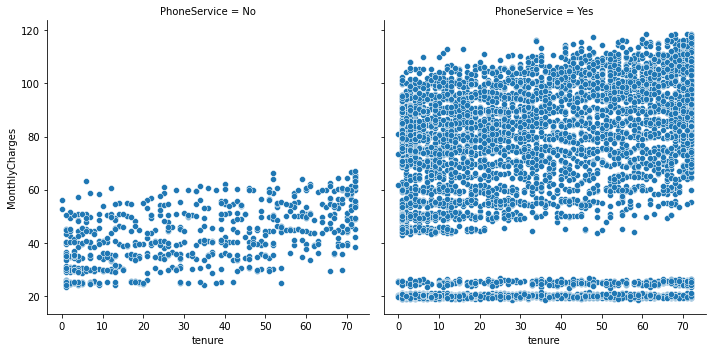

In [87]:
#control phone with tenure and monthly charges
sns.relplot(data=df, x= "tenure", y ="MonthlyCharges", col = "PhoneService")

In [81]:
#create seperate dfs for no and yes
no_phone = df[df.PhoneService == "No"]
yes_phone = df[df.PhoneService == "Yes"]


In [82]:
#for no_phone control on tenure and monthly charges
#Ho: there is no linear correlation between tenure and monthly charges
#Ha: there is linear correlation berween tenure and monthly charges
r, p = stats.pearsonr(no_phone.tenure,no_phone.MonthlyCharges)
r,p

(0.5857597986661367, 4.6033703473423134e-64)

In [ ]:
#since is p < alpha, we reject null hypothesis and say there is correlation

In [83]:
#for yes_phone control on tenure and monthly charges
#Ho: there is no linear correlation between tenure and monthly charges
#Ha: there is linear correlation berween tenure and monthly charges
r, p = stats.pearsonr(yes_phone.tenure,yes_phone.MonthlyCharges)
r,p

(0.24538898585362878, 7.117871077967264e-88)

In [84]:
#since is p < alpha, we reject null hypothesis and say there is correlation

In [ ]:
#control phone on tenure and total charges

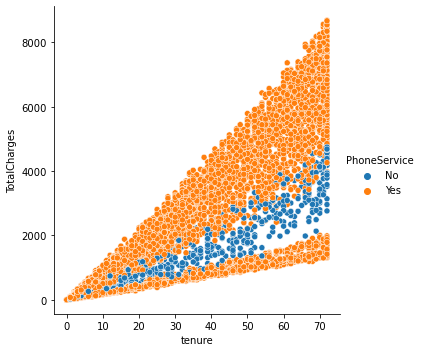

In [85]:
sns.relplot(data=df, x = "tenure", y = "TotalCharges", hue = 'PhoneService')

In [88]:
##for no_phone control on tenure and total charges
#Ho: there is no linear correlation between tenure and total charges
#Ha: there is linear correlation berween tenure and total charges
r, p = stats.pearsonr(no_phone.tenure,no_phone.TotalCharges)
r,p

(0.9535697728407464, 0.0)

In [ ]:
#since p < alpha, we reject null hypothesis
#infact the correlation is strong as r is close to 1

In [89]:
###for no_phone control on tenure and total charges
#Ho: there is no linear correlation between tenure and total charges
#Ha: there is linear correlation berween tenure and total charges
r, p = stats.pearsonr(yes_phone.tenure,yes_phone.TotalCharges)
r,p

(0.8301076972900363, 0.0)

In [ ]:
#since p < alpha, we reject null hypothesis
#infact the correlation is strong as r is close to 1

What happens of you control for internet services

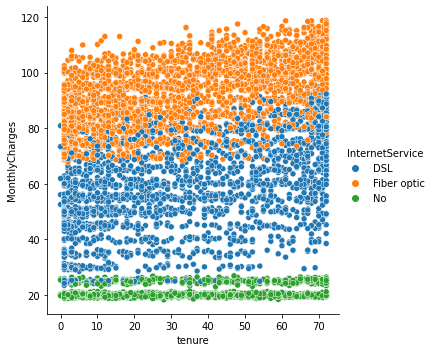

In [90]:
#lets see the graph for tenure and monthly charges with control internet services
sns.relplot(data = df, x = "tenure", y = "MonthlyCharges", hue = "InternetService")

In [93]:
#just curious
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [101]:
#Create dataframes for control
fiber_optics_df = df[df.InternetService == "Fiber optic"]
#fiber_optics_df.head()
dsl_df = df[df.InternetService == "DSL"]
#dsl_df.head()
no_internet_df = df[df.InternetService == 'No']
#no_internet_df.head()

In [102]:
# for control fiber optics tenure and monthly charges
#Ho: there is no linear correlation between tenure and monthly charges
#Ha: there is linear correlation berween tenure and monthly charges
r, p = stats.pearsonr(fiber_optics_df.tenure,fiber_optics_df.MonthlyCharges)
r,p 

(0.6246206176175583, 0.0)

In [ ]:
#since p < alpha, we reject null hypothesis and say there is the linear correlation

In [103]:
#for control dsl on tenure and monthly charges
#Ho: there is no linear correlation between tenure and monthly charges
#Ha: there is linear correlation berween tenure and monthly charges
r, p = stats.pearsonr(dsl_df.tenure,dsl_df.MonthlyCharges)
r,p 

(0.5172828196602488, 8.360426862286535e-166)

In [ ]:
#since p < alpha, we reject null hypothesis and say there is the linear correlation

In [104]:
#for control no internet on tenure annd monthly charges
#Ho: there is no linear correlation between tenure and monthly charges
#Ha: there is linear correlation berween tenure and monthly charges
r, p = stats.pearsonr(no_internet_df.tenure,no_internet_df.MonthlyCharges)
r,p 

(0.34232562306194453, 3.356186955197392e-43)

In [ ]:
#since p < alpha, we reject null hypothesis and say there is the linear correlation

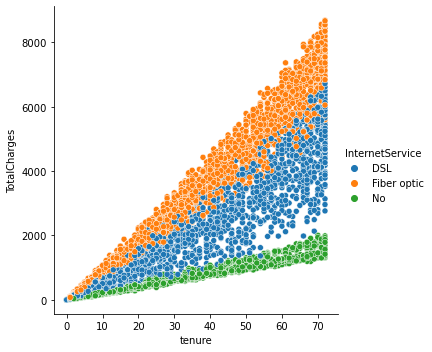

In [106]:
#graph with control internet services on tenure and total charges
sns.relplot(data = df, x ="tenure", y = "TotalCharges", hue = "InternetService")

In [109]:
#control Fiber optics on tenure vs total charges
#Ho: there is no linear correlation between tenure and total charges
#Ha: there is linear correlation berween tenure and total charges
r,p = stats.pearsonr(fiber_optics_df.tenure, fiber_optics_df.TotalCharges)
r,p

(0.9853093528070603, 0.0)

In [ ]:
#since p<alpha, we reject null hypothesis and say there is the linear correlation tenure and total charges

In [110]:
# control DSL on tenure and total charges
#Ho: there is no linear correlation between tenure and total charges
#Ha: there is linear correlation berween tenure and total charges
r,p = stats.pearsonr(dsl_df.tenure, dsl_df.TotalCharges)
r,p

(0.9413276892816258, 0.0)

In [ ]:
#since p<alpha, we reject null hypothesis and say there is the linear correlation tenure and total charges

In [111]:
# control no_internet  on tenure and total charges
#Ho: there is no linear correlation between tenure and total charges
#Ha: there is linear correlation berween tenure and total charges
r,p = stats.pearsonr(no_internet_df.tenure, no_internet_df.TotalCharges)
r,p

(0.9815669784401057, 0.0)

In [ ]:
#since p<alpha, we reject null hypothesis and say there is the linear correlation tenure and total charges

In [ ]:
#missunderstool the question here, the controls applies together so here is the solution

In [16]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


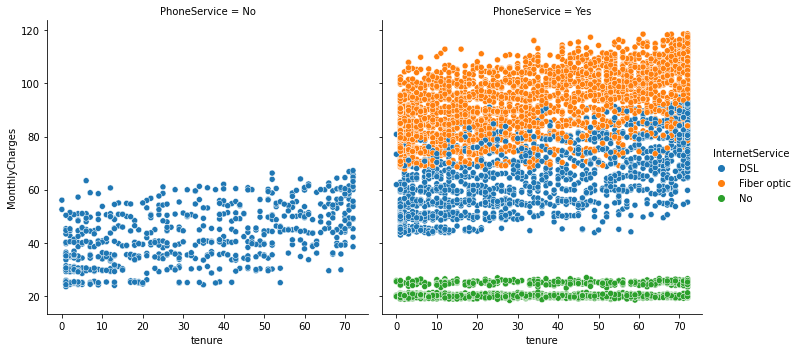

In [17]:
#plot with both controls
sns.relplot(data=df, x=df.tenure, y=df.MonthlyCharges, 
            col=df.PhoneService, hue=df.InternetService)

plt.show()

In [18]:
#use groupby to show internetserive and phoneservice grouping
df.groupby(['InternetService','PhoneService']).count()

customerID  gender  SeniorCitizen  Partner  \
InternetService PhoneService                                               
DSL             No                   682     682            682      682   
                Yes                 1739    1739           1739     1739   
Fiber optic     Yes                 3096    3096           3096     3096   
No              Yes                 1526    1526           1526     1526   

                              Dependents  tenure  MultipleLines  \
InternetService PhoneService                                      
DSL             No                   682     682            682   
                Yes                 1739    1739           1739   
Fiber optic     Yes                 3096    3096           3096   
No              Yes                 1526    1526           1526   

                              OnlineSecurity  OnlineBackup  DeviceProtection  \
InternetService PhoneService                                                   
DSL             No                       682           682               682   
                Yes                     1739          1739              1739   
Fiber optic     Yes                     3096          3096              3096   
No              Yes                     1526          1526              1526   

                              TechSupport  StreamingTV  StreamingMovies  \
InternetService PhoneService                                              
DSL             No                    682          682              682   
                Yes                  1739         1739             1739   
Fiber optic     Yes                  3096         3096             3096   
No              Yes                  1526         1526             1526   

                              Contract  PaperlessBilling  PaymentMethod  \
InternetService PhoneService                                              
DSL             No                 682               682            682   
                Yes               1739              1739           1739   
Fiber optic     Yes               3096              3096           3096   
No              Yes               1526              1526           1526   

                              MonthlyCharges  TotalCharges  Churn  
InternetService PhoneService                                       
DSL             No                       682           682    682  
                Yes                     1739          1739   1739  
Fiber optic     Yes                     3096          3096   3096  
No              Yes                     1526          1526   1526

In [19]:
#define correlation function
def corr_fun(df):
    return pd.Series(stats.pearsonr(df.tenure, df.TotalCharges), index=['r','p'])

In [1]:
#use apply to apply correlation function
#df.groupby(['InternetService','PhoneService']).apply(corr_fun)

2. Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [75]:
import env
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'


In [127]:
query = '''
      SELECT
      DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
      s.salary AS salary
      FROM employees e
      JOIN salaries s
      USING (emp_no)
      WHERE s.to_date > NOW()
      '''
df = pd.read_sql(query,url)
df.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


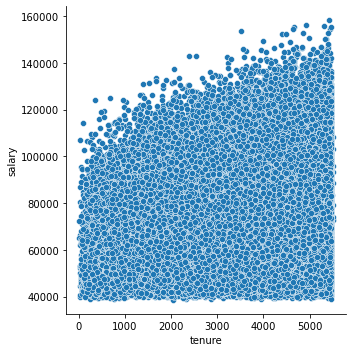

In [128]:
#plot 
sns.relplot(data = df, x = "tenure", y = "salary" )

In [130]:
# set up
#Ho: there is no correlation between tenure and salary
#Ha: there is correlation between tenure ans salary
r, p = stats.pearsonr(df.tenure,df.salary)
r, p


(0.30646256131860783, 0.0)

In [ ]:
#since p < alpha, we reject null hypothesis 
#there is correlation between tenure and salary


Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [5]:
# our good old sql query
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

df = pd.read_sql(sql,url)
df.head()

,emp_no,title_count,days_on_job
0,10001,1,13188
1,10002,1,13405
2,10003,1,13125
3,10004,2,13030
4,10005,2,12014


In [ ]:
#our hypothesis
#Ho: there is no linear correlation between number of titles to number of days on job
#Ha: there is a linear correlation between number of titles to number of days on job

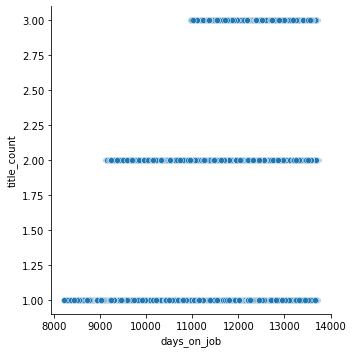

In [8]:
# for eyes
sns.relplot(data=df, y = 'title_count', x = "days_on_job")
plt.show()

In [10]:
#correlation test
r , p = stats.pearsonr(df.days_on_job,df.title_count)
r, p

(0.266598929913662, 0.0)

In [ ]:
#since p < alpha, we reject null hypothesis and assert they are coorelated lineraly

3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [118]:
from pydataset import data

In [120]:
df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


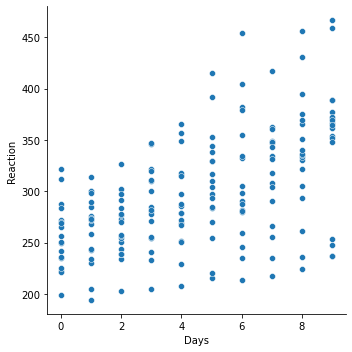

In [123]:
#plot
sns.relplot(data = df, x = "Days", y = "Reaction")
plt.show()

In [124]:
# Our setup 

# Ho: there is no linear correlation between days and reaction time 
#H1: there is a linear correlation between days and reaction time

r , p = stats.pearsonr(df.Days, df.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [ ]:
#since p < alpha, we reject null hypothesis and assert that there is a linear
#corrrelation between days and reaction time

# Chi Square tests

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [9]:
#create the dataframe
observed = pd.DataFrame({'codeup Student': [49 , 1], 'not a codeup student': [20,30]}, index = ["uses a macbook", "doesnot use a macbook"])
observed

,codeup Student,not a codeup student
uses a macbook,49,20
doesnot use a macbook,1,30


In [ ]:
#our hypothesis
Ho: there is no dependence between using a macbook and being a codeup student
Ha: there is dependence between using a macbook and being a codeup student   

In [10]:
#run test
chi2,p,degf,expected = stats.chi2_contingency(observed)


In [25]:
#print values
print("observed\n")
print(observed.values)
print('.....\n')
#print('\n')
print("expected\n")
print(expected)
print(".....\n")
print("chi2 = ", round(chi2, 5))
print("p=", round(p, 8))


observed

[[49 20]
 [ 1 30]]
.....

expected

[[34.5 34.5]
 [15.5 15.5]]
.....

chi2 =  36.65264
p= 0.0


In [26]:
#our moment of truth
alpha = 0.05

if p < alpha:
    print('reject null hypothesis and conclude they are dependent')
else:
    print("fail to reject null hypothesis and conclude they are not dependent")
    

reject null hypothesis and conclude they are dependent


2. Choose another 2 categorical variables from the mpg dataset and perform a 
chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [48]:
#pull the data
mpg = data("mpg")
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [42]:
#investigate trans
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [58]:
#make new transmission column with auto and manual only cleaned up
mpg["transmission"] = np.where(mpg.trans.str.contains('auto'), 'automatic', "manual")

mpg.head(4)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,automatic


In [64]:
#investigate class
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [60]:
#our hypothesis
#Ho: transmission is not dependent on the class of vehicle
#Ha:transmission is dependent on the class of vehicle

In [66]:
#make of observation table using cross tab
observed = pd.crosstab(mpg.transmission, mpg["class"])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
transmission,,,,,,,
automatic,2,24,29,11,20,16,55
manual,3,23,12,0,13,19,7


In [68]:
#run the chi test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [72]:
#print values#print values
print("observed\n")
print(observed.values)
print('.....\n')
#print('\n')
print("expected\n")
print(expected)
print(".....\n")
print("chi2 = ", round(chi2, 5))
print("p=", round(p, 8))


observed

[[ 2 24 29 11 20 16 55]
 [ 3 23 12  0 13 19  7]]
.....

expected

[[ 3.35470085 31.53418803 27.50854701  7.38034188 22.14102564 23.48290598
  41.5982906 ]
 [ 1.64529915 15.46581197 13.49145299  3.61965812 10.85897436 11.51709402
  20.4017094 ]]
.....

chi2 =  33.77003
p= 7.45e-06


In [101]:
if p < alpha:
    print('reject null hypothesis')
else:
    print("fail to reject null hypothesis")
    

fail to reject null hypothesis


3. Use the data from the employees database to answer these questions:



Is an employee's gender independent of whether an employee works in sales or marketing?

In [165]:
#sql query
sql = '''
SELECT e.gender, d.dept_name
FROM employees as e
JOIN dept_emp as de
USING (emp_no)
JOIN departments as d
USING (dept_no)
WHERE to_date > NOW();

'''

In [166]:
#pull data from sql
df = pd.read_sql(sql,url)
df.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [167]:
#what is there is the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   dept_name  240124 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [168]:
#see unique items in dept 
df.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [169]:
#filter in customer service and sales only
df = df[(df.dept_name == "Marketing") | (df.dept_name == "Sales")]

In [170]:
#make a croostab table of observed data
observed = pd.crosstab(df.gender,df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [173]:
#our assumptions
#Ho: there is no dependance between sex and employees who work in sales or marketing
#Ha: Ho: there is dependance between sex and employees who work in sales or marketing


In [174]:
#run test
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('observed')
print('.......')
print(observed.values)
print('.......')
print("expected")
print(expected.astype(int))
print('.......')
print('chi2=', chi2)
print('p=', p)

observed
.......
[[ 5864 14999]
 [ 8978 22702]]
.......
expected
[[ 5893 14969]
 [ 8948 22731]]
.......
chi2= 0.3240332004060638
p= 0.5691938610810126


In [175]:
if p < alpha:
    print('reject null hypothesis')
else:
    print("fail to reject null hypothesis")
    

fail to reject null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

In [176]:
#sql query
sql= '''

SELECT e.emp_no, e.gender,dm.dept_no
FROM employees as e
LEFT JOIN dept_manager as dm
USING (emp_no)

'''

In [177]:
#pull data from sql
df = pd.read_sql(sql,url)

df.head()

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [178]:
#take a look at dept_no
df.dept_no.value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [179]:
#make a new column replacing any department with yes.
df["manager"] = np.where(df.dept_no.str.contains ('d'), 'yes', 'no')
df.head()

,emp_no,gender,dept_no,manager
0,10001,M,None,no
1,10002,F,None,no
2,10003,M,None,no
3,10004,M,None,no
4,10005,M,None,no


In [180]:
df.manager.value_counts()

no     300000
yes        24
Name: manager, dtype: int64

In [ ]:
#or can use fillna to replace none with 0
#df.dept_no = df.dept_no.fillna(0) then use np where to give counts for managers

In [ ]:
# our hypothesis
Ho: gender is not dependent on having management position
H1: gender is dependent on having management position

In [181]:
observed = pd.crosstab(df.manager,df.gender)
observed

gender,F,M
manager,,
no,120038,179962
yes,13,11


In [182]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [183]:
print('observed')
print('.......')
print(observed.values)
print('.......')
print("expected")
print(expected.astype(int))
print('.......')
print('chi2=', chi2)
print('p=', p)

observed
.......
[[120038 179962]
 [    13     11]]
.......
expected
[[120041 179958]
 [     9     14]]
.......
chi2= 1.4566857643547197
p= 0.22745818732810363


In [184]:
if p < alpha:
    print('reject null hypothesis')
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis
